# Visualizing Exoplanets

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exoplanet properties

Over the past few decades, astronomers have discovered thousands of extrasolar planets. The following paper describes the properties of some of these planets.

http://iopscience.iop.org/1402-4896/2008/T130/014001

Your job is to reproduce Figures 2 and 4 from this paper using an up-to-date dataset of extrasolar planets found on this GitHub repo:

https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue

A text version of the dataset has already been put into this directory. The top of the file has documentation about each column of data:

In [2]:
with open('data/open_exoplanet_catalogue.txt') as f:
    for i in range(50):
        print(f.readline(), end='')

# Open Exoplanet Catalogue.
# https://github.com/hannorein/open_exoplanet_catalogue
# 
# Columns: 
# 
#  1: Primary identifier of planet
#  2: Binary flag [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)]
#  3: Planetary mass [Jupiter masses]
#  4: Radius [Jupiter radii]
#  5: Period [days]
#  6: Semi-major axis [Astronomical Units]
#  7: Eccentricity
#  8: Periastron [degree]
#  9: Longitude [degree]
# 10: Ascending node [degree]
# 11: Inclination [degree]
# 12: Surface or equilibrium temperature [K]
# 13: Age [Gyr]
# 14: Discovery method
# 15: Discovery year [yyyy]
# 16: Last updated [yy/mm/dd]
# 17: Right ascension [hh mm ss]
# 18: Declination [+/-dd mm ss]
# 19: Distance from Sun [parsec]
# 20: Host star mass [Solar masses]
# 21: Host star radius [Solar radii]
# 22: Host star metallicity [log relative to solar]
# 23: Host star temperature [K]
# 24: Host star age [Gyr]
# 
KOI-1843.03,0,0.0014,0.054,0.1768913,0.0048,,,,,

Use `np.genfromtxt` with a delimiter of `','` to read the data into a NumPy array called `data`:

In [3]:
data = np.genfromtxt('data/open_exoplanet_catalogue.txt', delimiter=',')

In [4]:
assert data.shape==(1993,24)

Create a Pandas `Series` object named `masses` with the masses of the planets. Drop all missing values and filter out (exclude) all planet masses larger than 15.

In [5]:
masses = pd.Series(data[:, 2]).dropna()
masses = masses[masses < 15]
len(masses)

1041

In [6]:
assert len(masses)==1041
assert type(masses)==pd.Series
assert len(masses[masses > 15])==0

Make a histogram of the distribution of planetary masses. This will reproduce Figure 2 in the original paper.

* Use the default Matplotlib 2.0 style as your starting point.
* Pick the number of bins for the histogram appropriately.
* Use y axis gridlines.
* Label the x- and y- axes and the plot title.
* Use appropriate x and y limits.

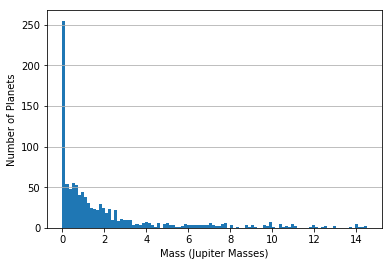

In [7]:
plt.hist(masses, bins = 100)
plt.ylabel('Number of Planets')
plt.xlabel('Mass (Jupiter Masses)')
plt.grid(axis='y')

Make a scatter plot of the orbital eccentricity (y) versus the semimajor axis. This will reproduce Figure 4 of the original paper.

* Use the default Matplotlib 2.0 style as your starting point.
* Use a log scale on the x axis.
* Label the x- and y- axis and the plot title.
* Use appropriate x and y limits.
* Use black filled circles with an alpha of 0.3 for the marks.

Text(0.5,0,'Log of Semimajor Axis')

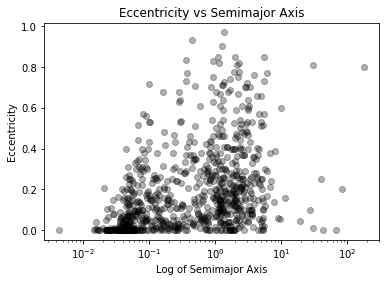

In [8]:
df = pd.DataFrame(data[:, 5:7], columns=['Semimajor', 'Eccentricity']).dropna()
plt.plot( 'Semimajor', 'Eccentricity', 'ok', alpha=.3, data=df)
plt.xscale('log')
plt.title('Eccentricity vs Semimajor Axis')
plt.ylabel('Eccentricity')
plt.xlabel('Log of Semimajor Axis')